In [1]:
# Predict Sales by building an end-to-end machine learning pipeline. It includes –

# 1)      Data Preprocessing

# 2)      Data Exploration

# 3)      Feature Engineering

# 4)      Model Building

# 5)      Model Evaluation

# Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import normaltest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor

# Data Gathering

In [3]:
# Training data gathering
Train_data=pd.read_csv(r"C:\Users\Atul\Downloads\Train.csv")
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Problem Statement

In [4]:
Train_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
# Testing data gathering
Test_data=pd.read_csv(r"C:\Users\Atul\Downloads\Test.csv")
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
Test_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


# EDA(Exploratory Data Analysis)

In [7]:
Train_data.shape

(8523, 12)

(8523, 12)

In [8]:
Test_data.shape

(5681, 11)

(5681, 11)

In [9]:
# Total data size=8523+5681=14204,so data split on 60,40 basis(60 percent fro traing and 40 persent for testing)

In [10]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [11]:
Train_data.isna().sum() 
# Item_weight is having approx 20 percent nan values and Outlet_Size is having approx 25 percent nan values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
Train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
# Univariate analysis
def analysis(numeric_data):
  for feature in numeric_data:
    sns.kdeplot(Train_data[feature])
    plt.show()

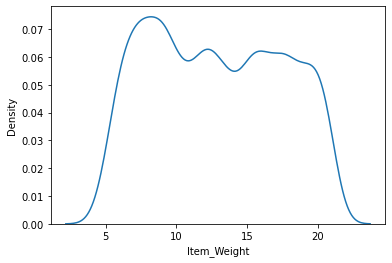

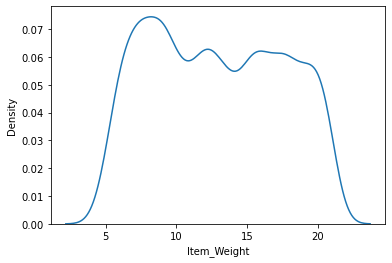

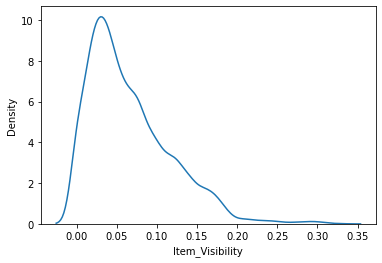

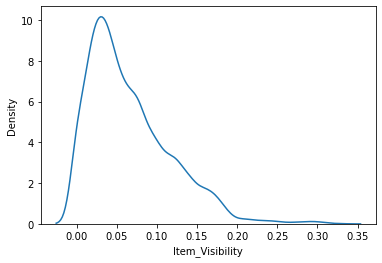

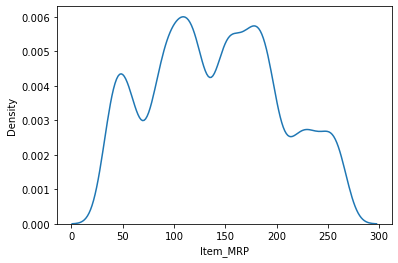

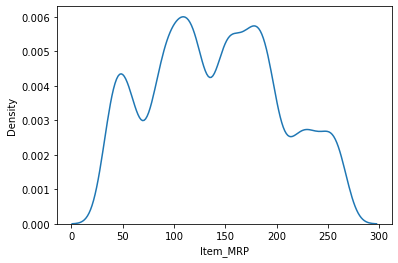

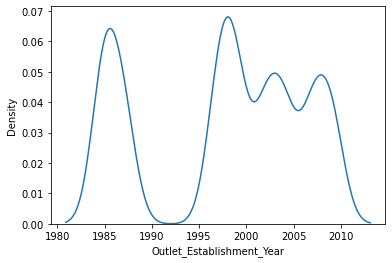

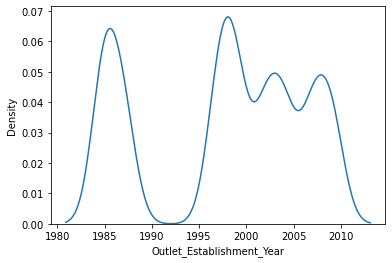

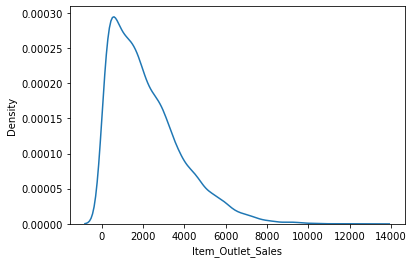

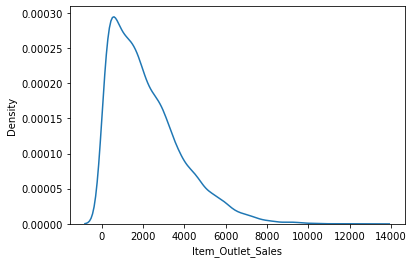

In [14]:
analysis(Train_data.describe()) 
# By this we got to know the numerical data is normally distributed

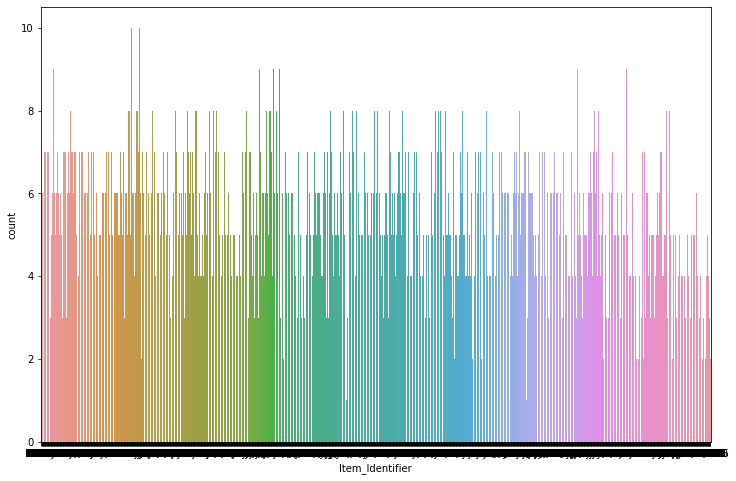

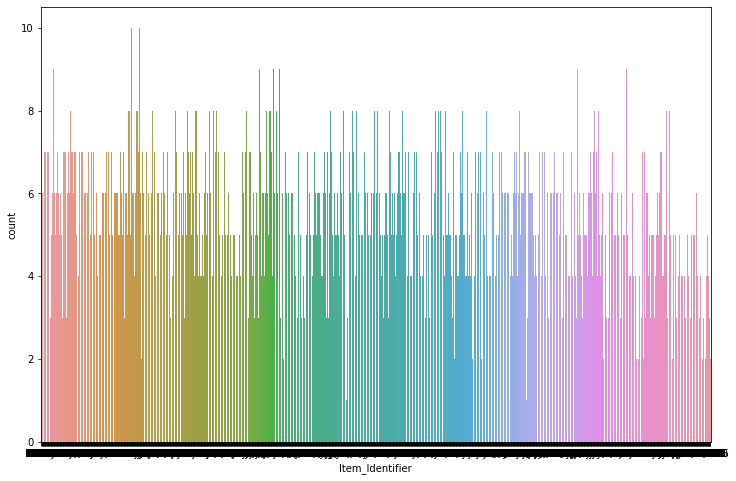

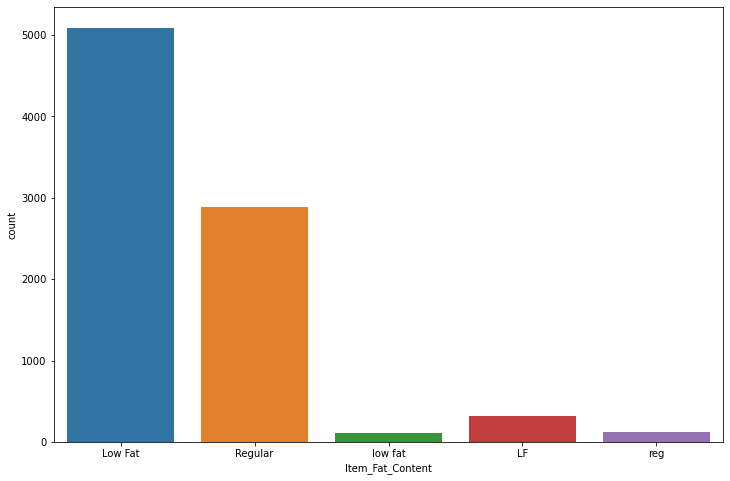

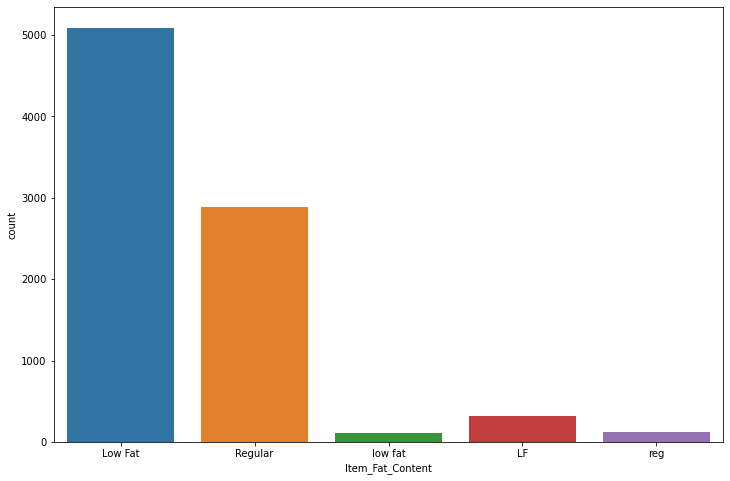

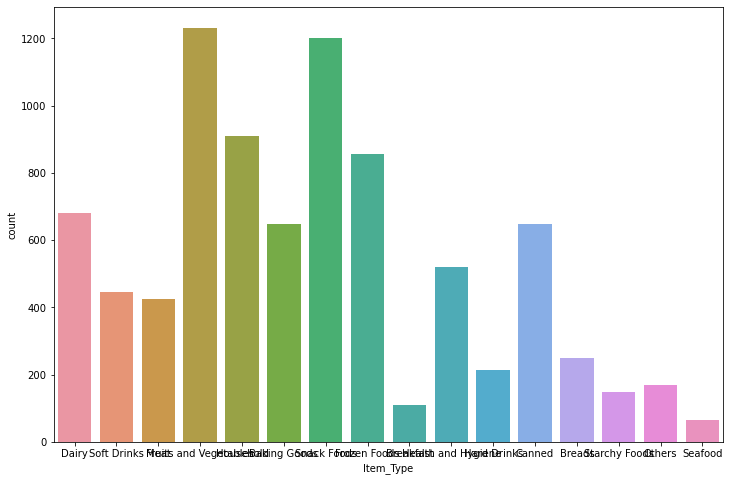

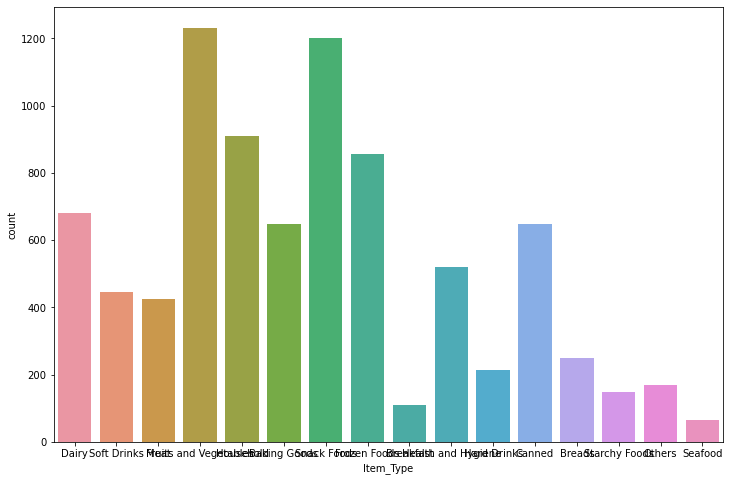

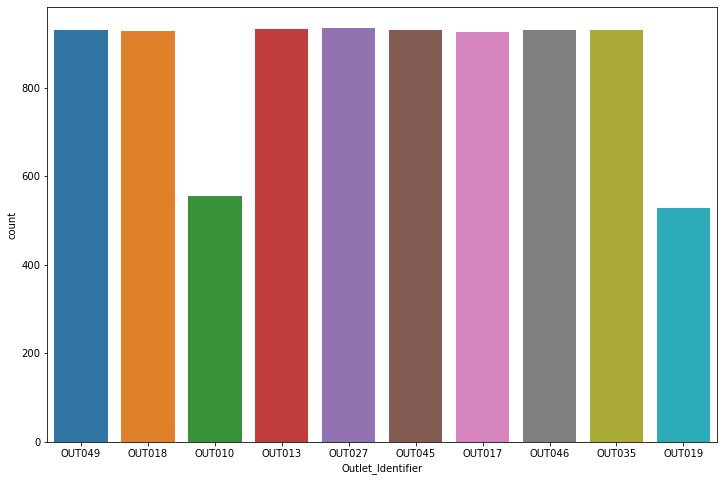

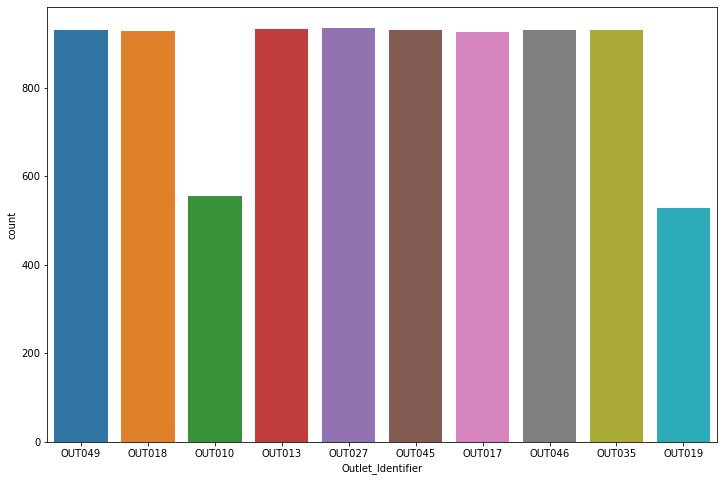

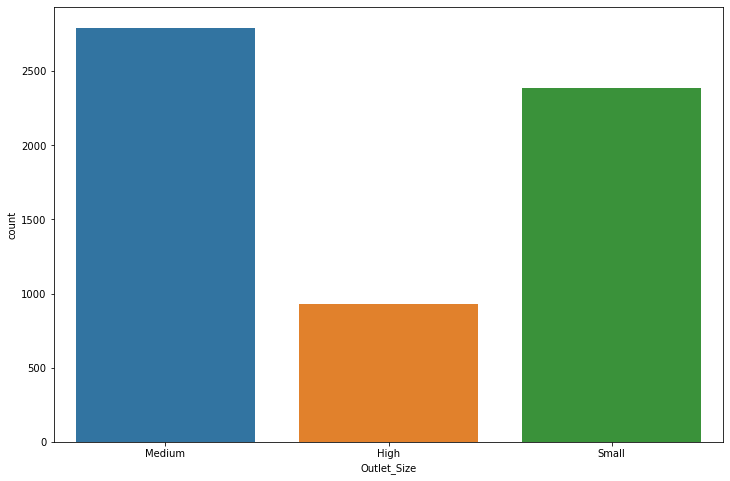

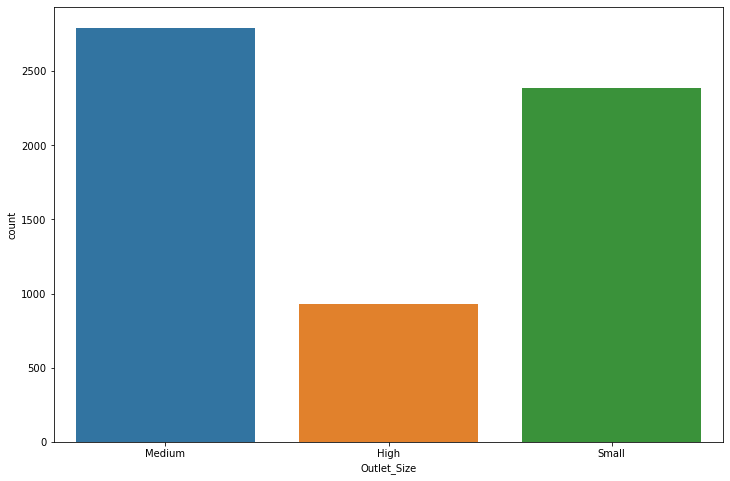

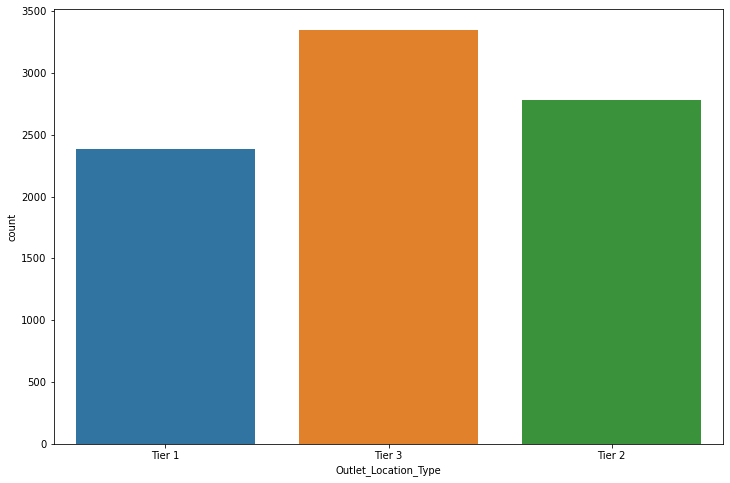

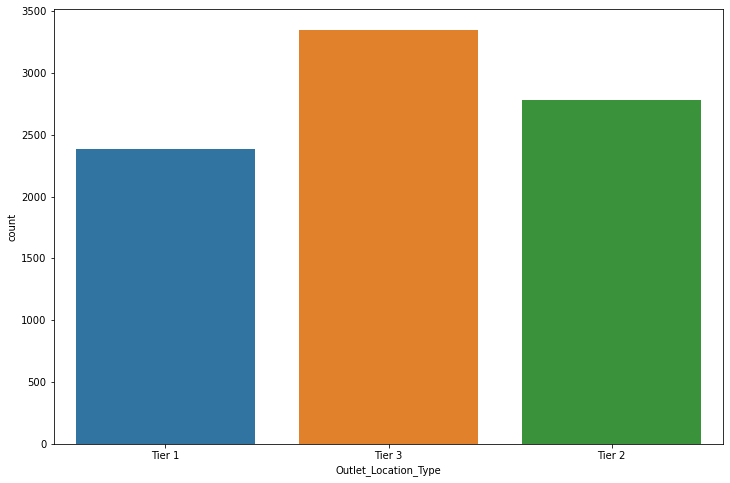

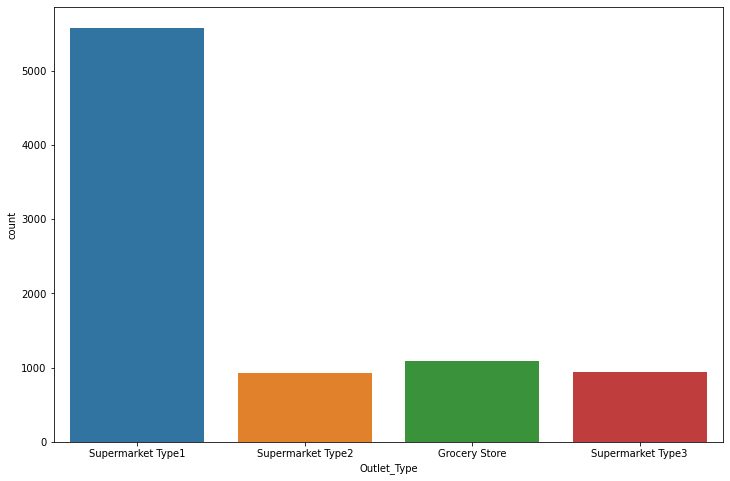

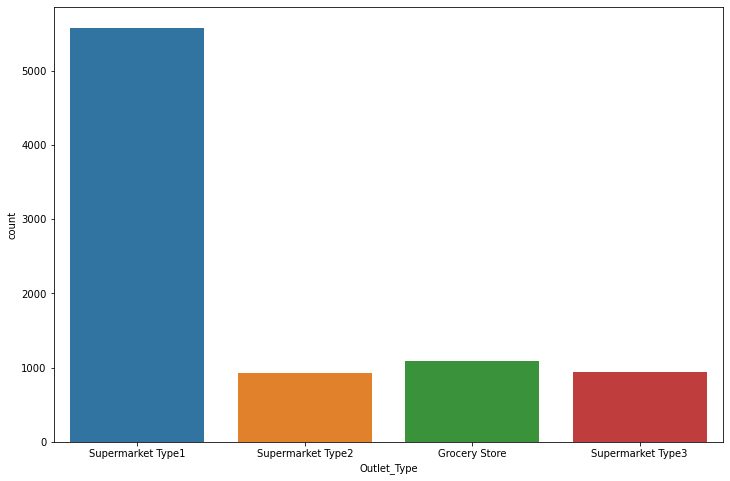

In [15]:
Categorical_data=Train_data.drop(Train_data.describe(),axis=1)
# For Categorical data analysis
def analysis(data):
  for feature in data:
    plt.figure(figsize=(12,8))
    sns.countplot(Train_data[feature])
    plt.show()
analysis(Categorical_data) 

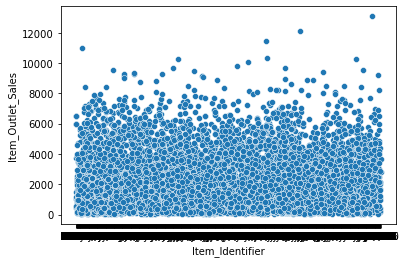

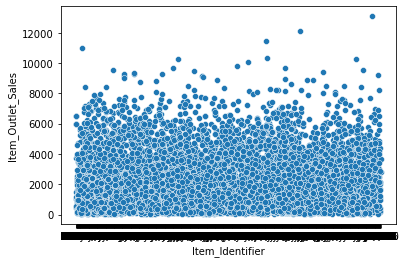

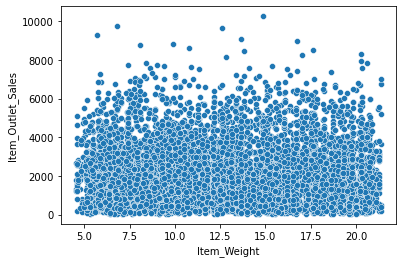

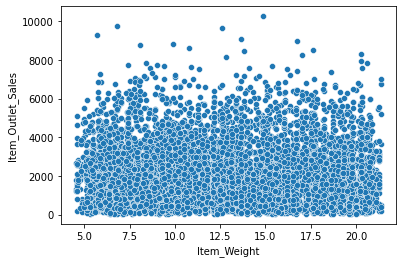

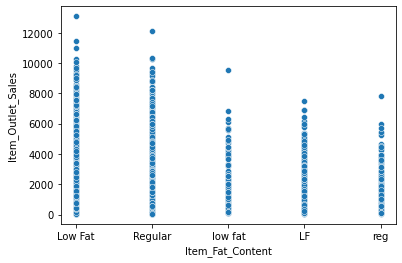

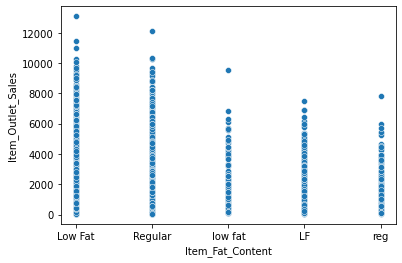

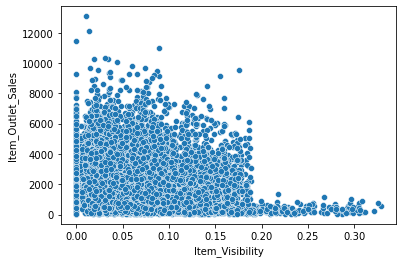

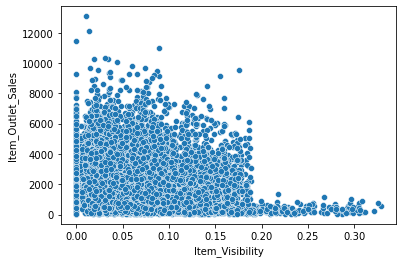

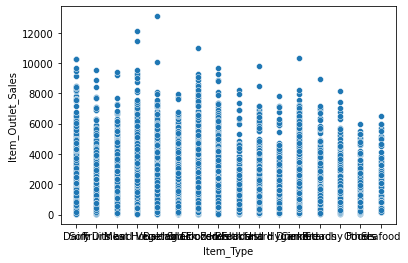

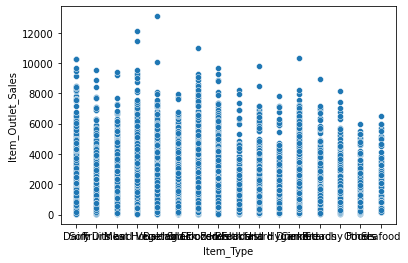

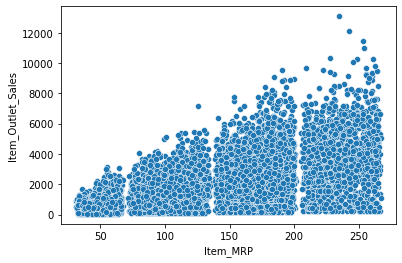

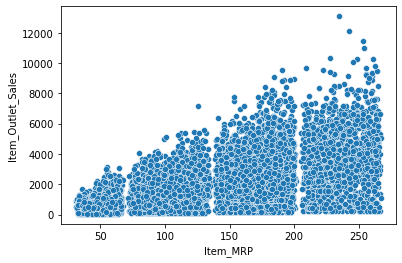

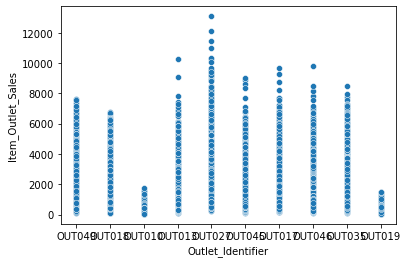

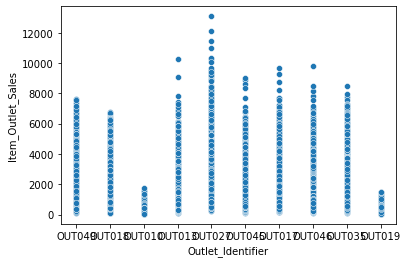

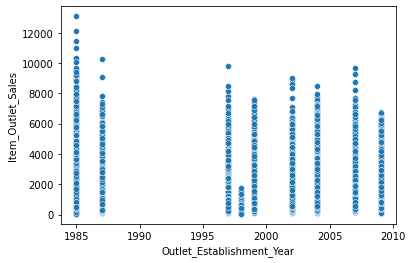

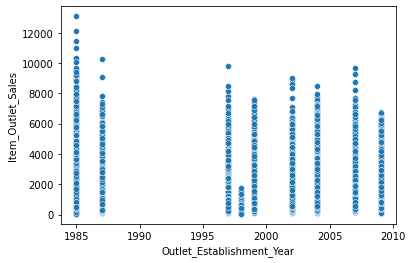

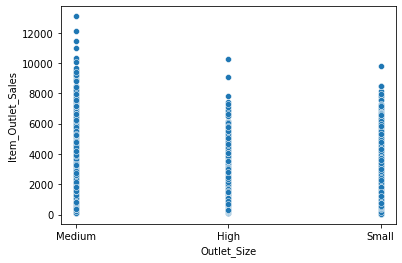

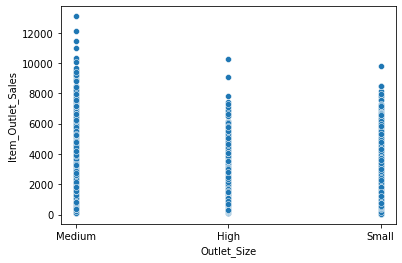

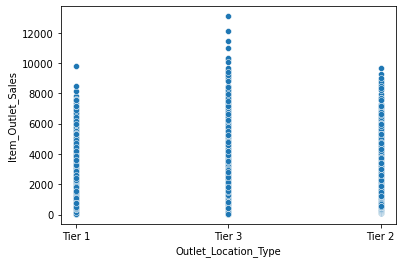

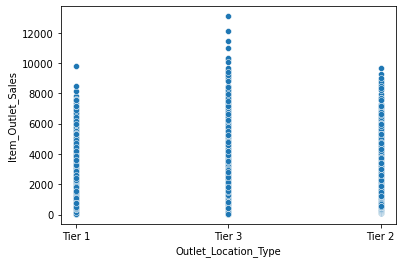

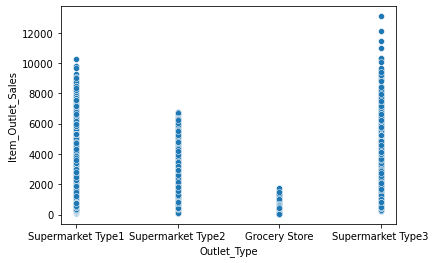

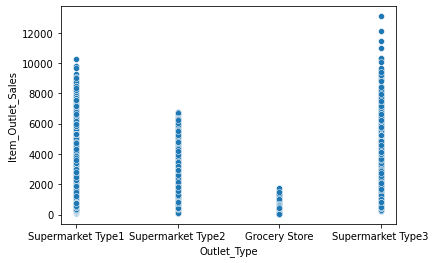

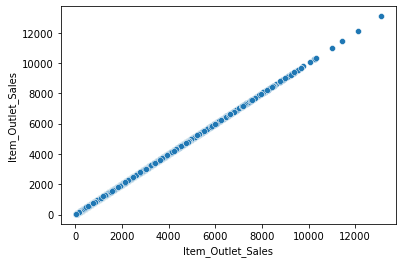

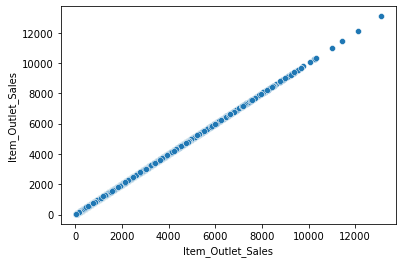

In [16]:
# Bivariate analysis
def Bivariate_analysis(data,Dependent_feature):
  for feature in data:
    sns.scatterplot(x=Train_data[feature],y=Dependent_feature)
    plt.show()
Bivariate_analysis(Train_data.columns,Train_data["Item_Outlet_Sales"])

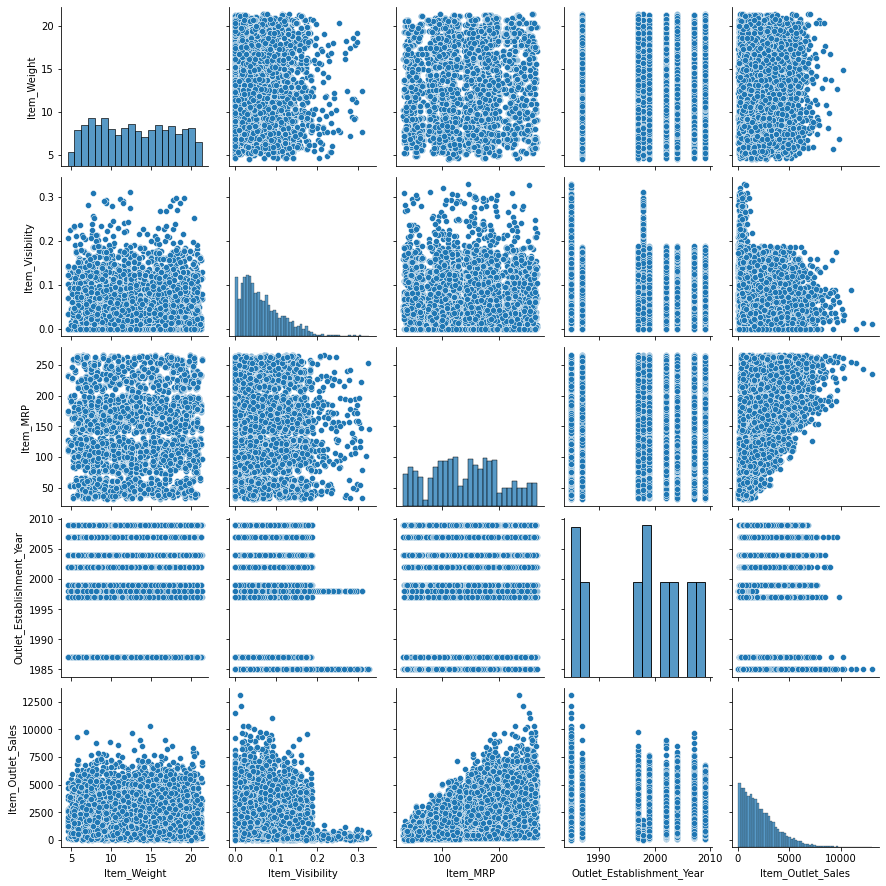

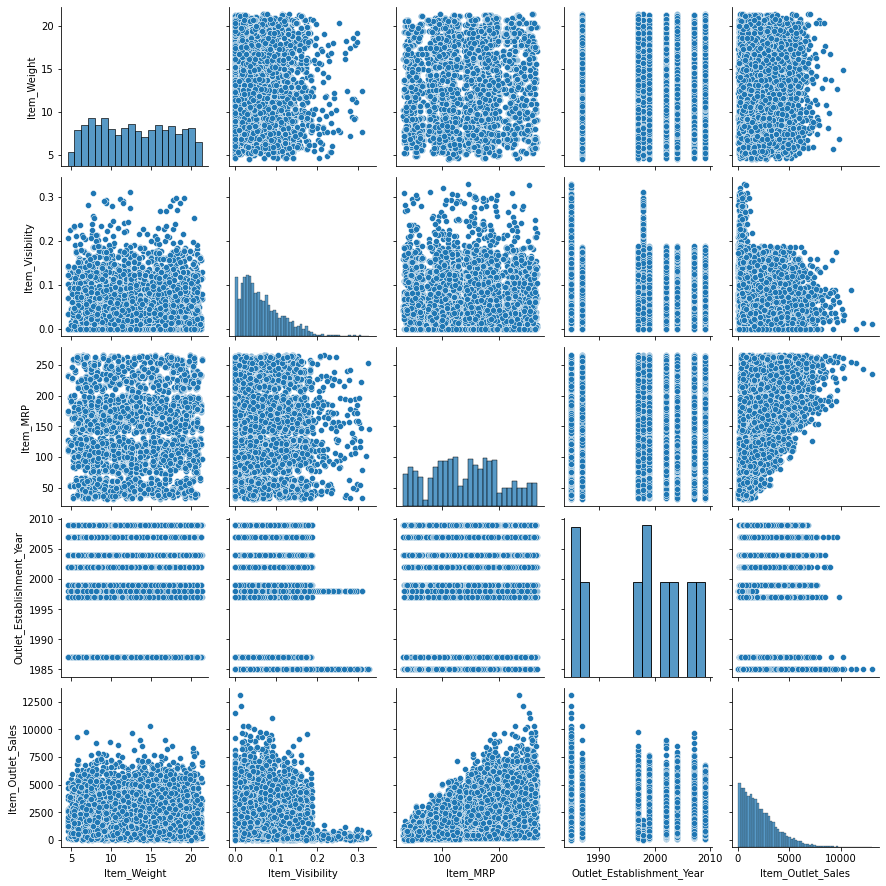

In [17]:
sns.pairplot(Train_data)

<AxesSubplot:>

<AxesSubplot:>

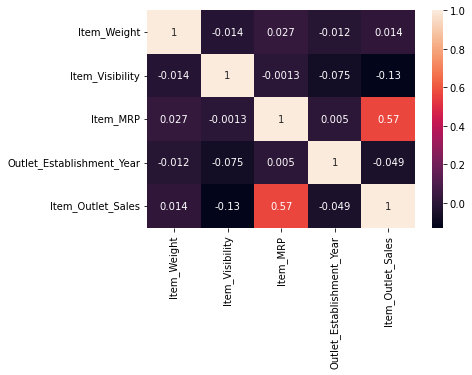

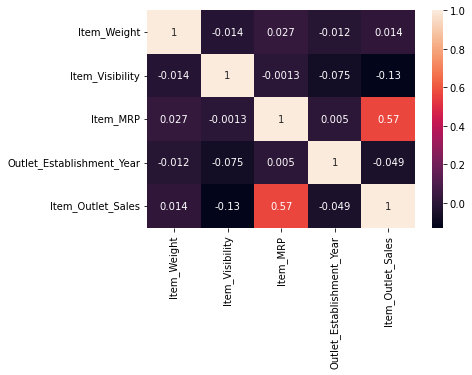

In [18]:
# To check correlation between features
sns.heatmap(Train_data.corr(),annot=True)

In [19]:
data=list(Train_data.describe())  
data

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

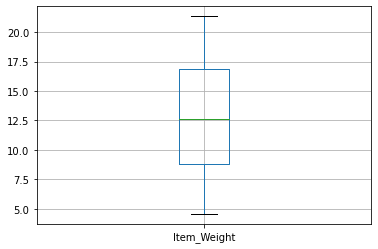

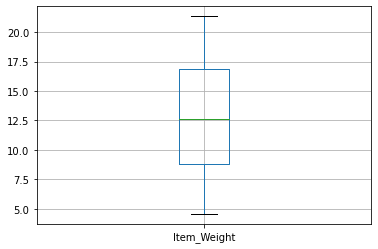

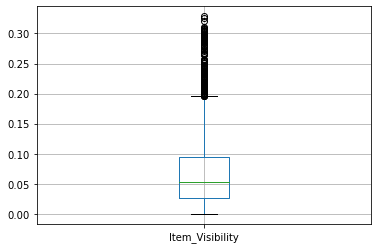

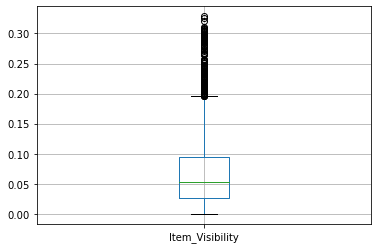

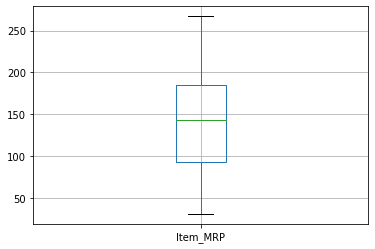

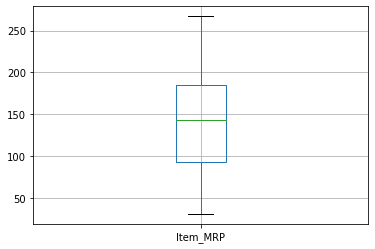

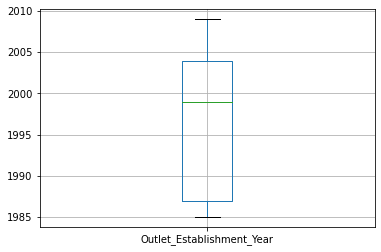

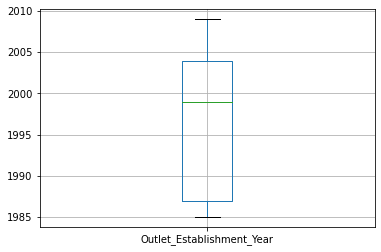

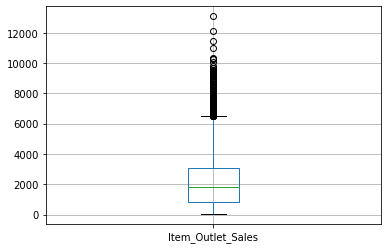

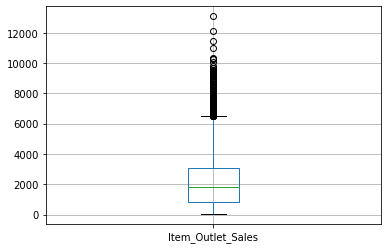

In [20]:
def Outlier_detection(data):
  for feature in data:
    Train_data[[feature]].boxplot()
    plt.show()
Outlier_detection(Train_data.describe())
# Item_Visibility having outlier in the data
# Item_Outlet_Sales also having outlier in data.

In [21]:
def Outlier_ind(feature):
  q1=Train_data[feature].quantile(0.25)
  q3=Train_data[feature].quantile(0.75)
  IQR=q3-q1
  upper_tail=q3+1.5*IQR
  lower_tail=q1-1.5*IQR
  return q1,q3,IQR,upper_tail,lower_tail
q1,q3,IQR,upper_tail,lower_tail=Outlier_ind('Item_Visibility')
q1,q3,IQR,upper_tail,lower_tail

(0.0269894775, 0.0945852925, 0.067595815, 0.195979015, -0.07440424500000001)

(0.0269894775, 0.0945852925, 0.067595815, 0.195979015, -0.07440424500000001)

In [22]:
Train_data["Item_Visibility"].loc[Train_data["Item_Visibility"]>upper_tail] 

49      0.255395
83      0.293418
108     0.278974
174     0.291865
334     0.204700
          ...   
8292    0.209163
8345    0.266397
8371    0.214125
8432    0.227261
8509    0.214306
Name: Item_Visibility, Length: 144, dtype: float64

49      0.255395
83      0.293418
108     0.278974
174     0.291865
334     0.204700
          ...   
8292    0.209163
8345    0.266397
8371    0.214125
8432    0.227261
8509    0.214306
Name: Item_Visibility, Length: 144, dtype: float64

In [23]:
Train_data["Item_Visibility"].loc[Train_data["Item_Visibility"]<lower_tail]
Train_data["Item_Visibility"].loc[Train_data["Item_Visibility"]>upper_tail] 

49      0.255395
83      0.293418
108     0.278974
174     0.291865
334     0.204700
          ...   
8292    0.209163
8345    0.266397
8371    0.214125
8432    0.227261
8509    0.214306
Name: Item_Visibility, Length: 144, dtype: float64

49      0.255395
83      0.293418
108     0.278974
174     0.291865
334     0.204700
          ...   
8292    0.209163
8345    0.266397
8371    0.214125
8432    0.227261
8509    0.214306
Name: Item_Visibility, Length: 144, dtype: float64

In [24]:
def Outlier(feature):
  q1_=Train_data[feature].quantile(0.25)
  q3_=Train_data[feature].quantile(0.75)
  IQR_=q3-q1
  upper=q3+1.5*IQR
  lower=q1-1.5*IQR
  return q1,q3,IQR,upper_tail,lower_tail

q1_,q3_,IQR_,upper,lower=Outlier('Item_Outlet_Sales')
q1_,q3_,IQR_,upper,lower

(0.0269894775, 0.0945852925, 0.067595815, 0.195979015, -0.07440424500000001)

(0.0269894775, 0.0945852925, 0.067595815, 0.195979015, -0.07440424500000001)

In [25]:
for i in Categorical_data:
  print(Train_data[i].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    279

In [26]:
for i in Categorical_data:
  print(Train_data[i].unique())
  print(Train_data[i].nunique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
1559
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
5
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
16
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
10
['Medium' nan 'High' 'Small']
3
['Tier 1' 'Tier 3' 'Tier 2']
3
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
4
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
1559
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
5
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
16
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
10
['Medium' nan 'High' '

In [27]:
# # Observation on data analysis
# Item_Visibility has 526 zeros
# Item_Identifier is uniformly distributed
# Outlet_Size has 2410 (28%) missing values
# Item_Weight has 1463 (17%) missing values
# Outlet_Establishment_Year is highly correlated with Outlet_Identifier,Outlet_type,Outlet_Location_Type
# Outlet_Type is highly correlated with Outlet_Identifier,Outlet_Location_Type,Outlet_Establishment_Year,Outlet_Size
# Outlet_Location_Type is highly correlated with Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_type
# Outlet_Size is highly correlated with Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_type

In [28]:
# Outlet_Establishment_Year is highly correlated with Outlet_type,Outlet_Location_Type
# Outlet_Type is highly correlated with Outlet_Location_Type,Outlet_Establishment_Year,Outlet_Size
# Outlet_Location_Type is highly correlated with Outlet_Establishment_Year,Outlet_Size,Outlet_type
# Outlet_Size is highly correlated with Outlet_Establishment_Year,Outlet_Location_Type,Outlet_type

<AxesSubplot:xlabel='Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type'>

<AxesSubplot:xlabel='Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type'>

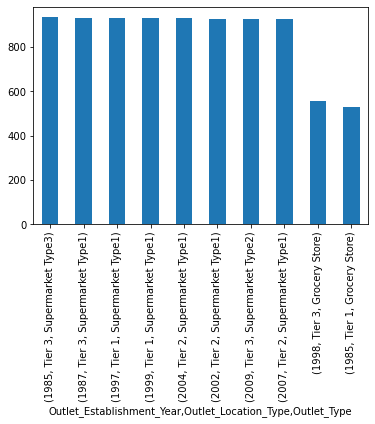

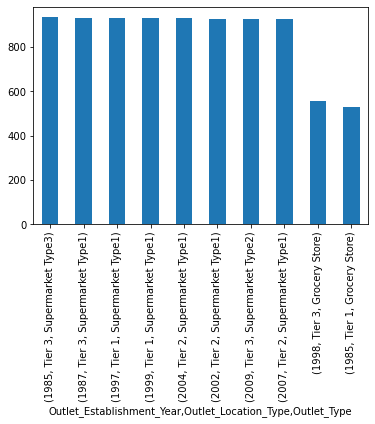

In [29]:
df=Train_data[["Outlet_Establishment_Year","Outlet_Location_Type","Outlet_Type"]]
df.value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Outlet_Location_Type,Outlet_Type'>

<AxesSubplot:xlabel='Outlet_Location_Type,Outlet_Type'>

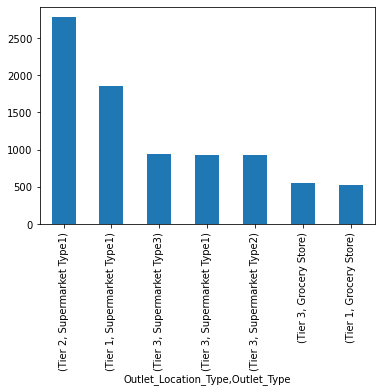

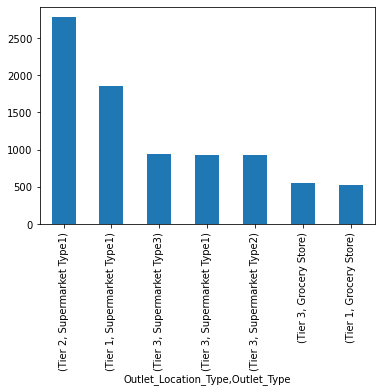

In [30]:
df=Train_data[["Outlet_Location_Type","Outlet_Type"]]
df.value_counts().plot(kind="bar")

In [31]:
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

# Feature Engineering

In [161]:
df=Train_data.copy()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [162]:
# Item_Weight is missing 17 percent values
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [163]:
# Outlet_Size is missing 28 percent values so we can drop this columns also but we will do this in feature selection part
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [164]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [165]:
df["Outlet_Type"].replace({"Grocery Store":0,"Supermarket Type3":1,"Supermarket Type2":2,"Supermarket Type1":3},inplace=True)

In [166]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [167]:
df["Outlet_Location_Type"].replace({"Tier 3":1,"Tier 2":2,"Tier 1":3},inplace=True)

In [168]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [169]:
df["Outlet_Size"].replace({"Small":0,"Medium":1,"High":2},inplace=True)

In [170]:
df["Outlet_Size"].median()

1.0

1.0

In [171]:
df["Outlet_age"]=2022-df["Outlet_Establishment_Year"]
df.drop("Outlet_Establishment_Year",axis=1,inplace=True)

In [172]:
df['Outlet_Size'].fillna(df['Outlet_Size'].median(),inplace=True)
df.isna().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_age              0
dtype: int64

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_age              0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


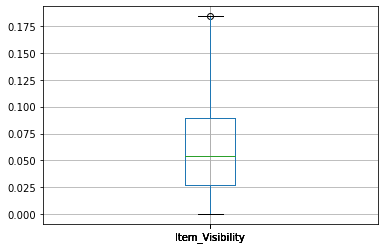

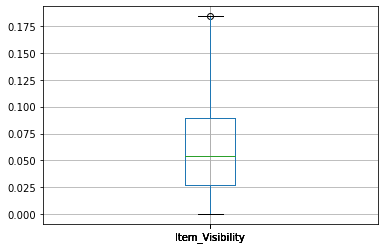

In [173]:
def outlier_removal(Item_Visibility):
  Visiblitity_mean=Train_data["Item_Visibility"].mean()
  for i in Train_data["Item_Visibility"]:
    if i>upper_tail:
      Train_data["Item_Visibility"]=Train_data["Item_Visibility"].replace(i,Visiblitity_mean)

for i in range(5):
  outlier_removal("Item_Visibility")
  q1,q3,IQR,upper_tail,lower_tail=Outlier_ind('Item_Visibility')
  Train_data["Item_Visibility"].loc[Train_data["Item_Visibility"]<lower_tail]
  Train_data["Item_Visibility"].loc[Train_data["Item_Visibility"]>upper_tail] 
  print(Train_data[["Item_Visibility"]].boxplot())

In [174]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [175]:
df=pd.get_dummies(df,columns=["Outlet_Identifier"])

In [176]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [177]:
df=pd.get_dummies(df,columns=["Item_Type"])

In [178]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [179]:
df["Item_Fat_Content"].replace({"LF":'Low Fat',"low fat":"Low Fat","reg":'Regular'},inplace=True)

In [180]:
df["Item_Fat_Content"].replace({"Low Fat":0,'Regular':1},inplace=True)

In [181]:
df["Item_Identifier"]=df["Item_Identifier"].apply(lambda x:x[:2])
df["Item_Identifier"]
df["Item_Identifier"].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [182]:
df=pd.get_dummies(df,columns=["Item_Identifier"])

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int64  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Size                      8523 non-null   float64
 5   Outlet_Location_Type             8523 non-null   int64  
 6   Outlet_Type                      8523 non-null   int64  
 7   Item_Outlet_Sales                8523 non-null   float64
 8   Outlet_age                       8523 non-null   int64  
 9   Outlet_Identifier_OUT010         8523 non-null   uint8  
 10  Outlet_Identifier_OUT013         8523 non-null   uint8  
 11  Outlet_Identifier_OUT017         8523 non-null   uint8  
 12  Outlet_Identifier_OU

# Model_training

In [184]:
# Train_test_split data
X=df.drop("Item_Outlet_Sales",axis=1)
y=df["Item_Outlet_Sales"]

In [185]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6392, 37), (2131, 37), (6392,), (2131,))

((6392, 37), (2131, 37), (6392,), (2131,))

In [186]:
# Feature scaling
Minmax=MinMaxScaler()
df_train=Minmax.fit_transform(X_train)
df_test=Minmax.transform(X_test)
X_train_df=pd.DataFrame(df_train,columns=X_train.columns)
X_test_df=pd.DataFrame(df_test,columns=X_test.columns)

# Linear Regression

In [187]:
lin_reg=LinearRegression()
lin_reg.fit(X_train_df,y_train)

LinearRegression()

LinearRegression()

In [188]:
def evaluation(model,X_actual,y_actual):
  pred=model.predict(X_actual)
  mse=mean_squared_error(y_actual,pred)
  print(f"The mean_squred_error={mse}")
  rmse=np.sqrt(mse)
  print(f"The root_mean_squred_error={rmse}")
  mae=mean_absolute_error(y_actual,pred)
  print(f"The mean_absolute_error= {mae}")
  r2=r2_score(y_actual,pred)
  print(f"The r2_score={r2}")

In [189]:
# Evaluation for training data
evaluation(lin_reg,X_train_df,y_train)

The mean_squred_error=1291003.2932894619
The root_mean_squred_error=1136.223258558573
The mean_absolute_error= 844.11516126408
The r2_score=0.5608916302812852
The mean_squred_error=1291003.2932894619
The root_mean_squred_error=1136.223258558573
The mean_absolute_error= 844.11516126408
The r2_score=0.5608916302812852


In [190]:
# Evaluation for training data
evaluation(lin_reg,X_test_df,y_test)

The mean_squred_error=1214983.9520838244
The root_mean_squred_error=1102.2631047457883
The mean_absolute_error= 812.9381987329892
The r2_score=0.5702247690439551
The mean_squred_error=1214983.9520838244
The root_mean_squred_error=1102.2631047457883
The mean_absolute_error= 812.9381987329892
The r2_score=0.5702247690439551


In [191]:
# Linear Regression model giving accuracy of 56 % for both traing and testing so its underfitting model so try different algorithms

In [192]:
pred_train=lin_reg.predict(X_train)
pred_test=lin_reg.predict(X_test)
res_train=y_train-pred_train
res_test=y_test-pred_test

In [193]:
# Shapiro_test
stats,p_val=shapiro(res_train)
print(f"p_valfor train_res={p_val}")
stats,p_val=shapiro(res_test)
print(f"p_valfor test_res={p_val}")
# So both values are less than p<0.05 so residuals are not normally distributed

p_valfor train_res=0.0
p_valfor test_res=3.329498881331207e-31
p_valfor train_res=0.0
p_valfor test_res=3.329498881331207e-31


In [194]:
# KS_test
stats,p_val=kstest(res_train,"norm")
print(f"p_valfor train_res={p_val}")
stats,p_val=kstest(res_test,"norm")
print(f"p_valfor test_res={p_val}")
# So both values are less than p<0.05 so residuals are not normally distributed

p_valfor train_res=0.0
p_valfor test_res=0.0
p_valfor train_res=0.0
p_valfor test_res=0.0


In [195]:
# Normal_test
stats,p_val=normaltest(res_train)
print(f"p_valfor train_res={p_val}")
stats,p_val=normaltest(res_test)
print(f"p_valfor test_res={p_val}")
# So both values are less than p<0.05 so residuals are not normally distributed

p_valfor train_res=0.0
p_valfor test_res=3.3652268925086104e-204
p_valfor train_res=0.0
p_valfor test_res=3.3652268925086104e-204


# Knn Regression

In [196]:
knn=KNeighborsRegressor()
knn.fit(X_train_df,y_train)

KNeighborsRegressor()

KNeighborsRegressor()

In [197]:
evaluation(knn,X_train_df,y_train)

The mean_squred_error=1049784.6748049436
The root_mean_squred_error=1024.590003272013
The mean_absolute_error= 736.0048185231541
The r2_score=0.6429372105358884
The mean_squred_error=1049784.6748049436
The root_mean_squred_error=1024.590003272013
The mean_absolute_error= 736.0048185231541
The r2_score=0.6429372105358884


In [198]:
evaluation(knn,X_test_df,y_test)

The mean_squred_error=1514851.9715344007
The root_mean_squred_error=1230.7932285865083
The mean_absolute_error= 893.0737512717035
The r2_score=0.46415271180018025
The mean_squred_error=1514851.9715344007
The root_mean_squred_error=1230.7932285865083
The mean_absolute_error= 893.0737512717035
The r2_score=0.46415271180018025


In [199]:
# KNN model giving high bias and high variance output so we need to do hyperparametre tunning

In [200]:
params={"n_neighbors":np.arange(1,20),"p":[1,2]}
params

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 'p': [1, 2]}

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 'p': [1, 2]}

In [201]:
rscv=RandomizedSearchCV(knn,params,cv=5)
rscv.fit(X_train_df,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'p': [1, 2]})

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'p': [1, 2]})

In [202]:
rscv.best_params_

{'p': 2, 'n_neighbors': 7}

{'p': 2, 'n_neighbors': 7}

In [75]:
Hyp_knn=KNeighborsRegressor(n_neighbors=6,p=2)
Hyp_knn.fit(X_train_df,y_train)

KNeighborsRegressor(n_neighbors=6)

KNeighborsRegressor(n_neighbors=6)

In [76]:
evaluation(Hyp_knn,X_train_df,y_train)

The mean_squred_error=1071971.4284485616
The root_mean_squred_error=1035.3605306600023
The mean_absolute_error= 737.924097434293
The r2_score=0.6339348264851592
The mean_squred_error=1071971.4284485616
The root_mean_squred_error=1035.3605306600023
The mean_absolute_error= 737.924097434293
The r2_score=0.6339348264851592


In [77]:
evaluation(Hyp_knn,X_test_df,y_test)

The mean_squred_error=1518001.841866576
The root_mean_squred_error=1232.072173968139
The mean_absolute_error= 887.6905817456593
The r2_score=0.46946990465846883
The mean_squred_error=1518001.841866576
The root_mean_squred_error=1232.072173968139
The mean_absolute_error= 887.6905817456593
The r2_score=0.46946990465846883


In [78]:
# KNN model given accuracy of 62 for training data and 45 for testing data so its underfit model.Cannot accept the model.

# Decision_tree_regressor

In [79]:
Dtree=DecisionTreeRegressor(random_state=58)
Dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=58)

DecisionTreeRegressor(random_state=58)

In [80]:
evaluation(Dtree,X_train,y_train)

The mean_squred_error=0.0
The root_mean_squred_error=0.0
The mean_absolute_error= 0.0
The r2_score=1.0
The mean_squred_error=0.0
The root_mean_squred_error=0.0
The mean_absolute_error= 0.0
The r2_score=1.0


In [81]:
evaluation(Dtree,X_test,y_test)

The mean_squred_error=2549781.554094561
The root_mean_squred_error=1596.8035427361003
The mean_absolute_error= 1111.7344687939933The mean_squred_error=2549781.554094561
The root_mean_squred_error=1596.8035427361003
The mean_absolute_error= 1111.7344687939933
The r2_score=0.10887074462933177

The r2_score=0.10887074462933177


In [82]:
# Hyperparameter tunning
params={"criterion":["squared_error"],"max_depth":np.arange(7,28),"min_samples_split":np.arange(1,10),"min_samples_leaf":np.arange(1,10)}
params

{'criterion': ['squared_error'],
 'max_depth': array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        24, 25, 26, 27]),
 'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}

{'criterion': ['squared_error'],
 'max_depth': array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        24, 25, 26, 27]),
 'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}

In [83]:
rscv=RandomizedSearchCV(Dtree,params,cv=5)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=58),
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=58),
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [84]:
rscv.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_depth': 7,
 'criterion': 'squared_error'}

{'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_depth': 7,
 'criterion': 'squared_error'}

In [85]:
Hyp_Dtree=DecisionTreeRegressor(max_depth=7,min_samples_split=9,min_samples_leaf=9)
Hyp_Dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=9, min_samples_split=9)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=9, min_samples_split=9)

In [86]:
evaluation(Hyp_Dtree,X_train,y_train)

The mean_squred_error=1084242.9659495044
The root_mean_squred_error=1041.2698814185997
The mean_absolute_error= 727.0627173922163
The r2_score=0.6297442460411655
The mean_squred_error=1084242.9659495044
The root_mean_squred_error=1041.2698814185997
The mean_absolute_error= 727.0627173922163
The r2_score=0.6297442460411655


In [87]:
evaluation(Hyp_Dtree,X_test,y_test)

The mean_squred_error=1229146.525514859
The root_mean_squred_error=1108.6688078569086
The mean_absolute_error= 779.1000951346977
The r2_score=0.5704226402200729
The mean_squred_error=1229146.525514859
The root_mean_squred_error=1108.6688078569086
The mean_absolute_error= 779.1000951346977
The r2_score=0.5704226402200729


In [88]:
# The decesion_tree model also given us underfit model with training accurancy of 62 and testinga accuracy of 57.78 


# Random Forest

In [89]:
Ranf=RandomForestRegressor()
Ranf.fit(X_train,y_train)

RandomForestRegressor()

RandomForestRegressor()

In [90]:

# Ranf=RandomForestRegressor()
# Ranf.fit(X_train_df,y_train)

In [91]:
evaluation(Ranf,X_train,y_train)

The mean_squred_error=182550.25536709093
The root_mean_squred_error=427.25900267529875
The mean_absolute_error= 295.21132751157694
The r2_score=0.9376613134149971
The mean_squred_error=182550.25536709093
The root_mean_squred_error=427.25900267529875
The mean_absolute_error= 295.21132751157694
The r2_score=0.9376613134149971


In [92]:
evaluation(Ranf,X_test,y_test)

The mean_squred_error=1284781.4246515497
The root_mean_squred_error=1133.481991322116
The mean_absolute_error= 797.9359646072267
The r2_score=0.5509786662213252
The mean_squred_error=1284781.4246515497
The root_mean_squred_error=1133.481991322116
The mean_absolute_error= 797.9359646072267
The r2_score=0.5509786662213252


In [93]:
# Hyper parameter tunning
params={"n_estimators":np.arange(5,270,10),"max_depth":np.arange(10,29),"min_samples_split":np.arange(2,7),"min_samples_leaf":np.arange(1,7)}

In [94]:
rscv=RandomizedSearchCV(Ranf,params,cv=5)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6]),
                                        'min_samples_split': array([2, 3, 4, 5, 6]),
                                        'n_estimators': array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
       265])})

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6]),
                                        'min_samples_split': array([2, 3, 4, 5, 6]),
                                        'n_estimators': array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
       265])})

In [95]:
rscv.best_params_

{'n_estimators': 115,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_depth': 10}

{'n_estimators': 115,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [96]:
rscv.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=115)

RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=115)

In [97]:
Ranf=RandomForestRegressor(max_depth=11, min_samples_leaf=5, min_samples_split=3,
                      n_estimators=255)
Ranf.fit(X_train,y_train)

RandomForestRegressor(max_depth=11, min_samples_leaf=5, min_samples_split=3,
                      n_estimators=255)

RandomForestRegressor(max_depth=11, min_samples_leaf=5, min_samples_split=3,
                      n_estimators=255)

In [98]:
evaluation(Ranf,X_train,y_train)

The mean_squred_error=832831.3189425591
The root_mean_squred_error=912.5959231459228
The mean_absolute_error= 634.2690383252963
The r2_score=0.7155982583243534
The mean_squred_error=832831.3189425591
The root_mean_squred_error=912.5959231459228
The mean_absolute_error= 634.2690383252963
The r2_score=0.7155982583243534


In [99]:
evaluation(Ranf,X_test,y_test)

The mean_squred_error=1197779.7666209312
The root_mean_squred_error=1094.4312525786768
The mean_absolute_error= 769.9034343042317
The r2_score=0.5813850838269188
The mean_squred_error=1197779.7666209312
The root_mean_squred_error=1094.4312525786768
The mean_absolute_error= 769.9034343042317
The r2_score=0.5813850838269188


In [100]:
# Random Forest given training accuracy of 71 and teting accuracy of 59

# Adaboost regression

In [101]:
Ada=AdaBoostRegressor(random_state=28)
Ada.fit(X_train,y_train)

AdaBoostRegressor(random_state=28)

AdaBoostRegressor(random_state=28)

In [102]:
evaluation(Ada,X_train,y_train)

The mean_squred_error=1377044.2091767616
The root_mean_squred_error=1173.4752699468197
The mean_absolute_error= 923.8544768677624
The r2_score=0.5297561912639293
The mean_squred_error=1377044.2091767616
The root_mean_squred_error=1173.4752699468197
The mean_absolute_error= 923.8544768677624
The r2_score=0.5297561912639293


In [103]:
evaluation(Ada,X_test,y_test)

The mean_squred_error=1423395.3586043976
The root_mean_squred_error=1193.0613389949394
The mean_absolute_error= 926.446033556351
The r2_score=0.5025341508278236
The mean_squred_error=1423395.3586043976
The root_mean_squred_error=1193.0613389949394
The mean_absolute_error= 926.446033556351
The r2_score=0.5025341508278236


In [104]:
# Hyperparameter tunning
params={"n_estimators":np.arange(5,150,5),"learning_rate":np.arange(0.01,0.9,0.1)}
params

{'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
         70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
        135, 140, 145]),
 'learning_rate': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81])}

{'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
         70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
        135, 140, 145]),
 'learning_rate': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81])}

In [105]:
rscv=RandomizedSearchCV(Ada,params,cv=5)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=28),
                   param_distributions={'learning_rate': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81]),
                                        'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145])})

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=28),
                   param_distributions={'learning_rate': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81]),
                                        'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145])})

In [106]:
rscv.best_params_

{'n_estimators': 15, 'learning_rate': 0.31000000000000005}

{'n_estimators': 15, 'learning_rate': 0.31000000000000005}

In [107]:
rscv.best_estimator_

AdaBoostRegressor(learning_rate=0.31000000000000005, n_estimators=15,
                  random_state=28)

AdaBoostRegressor(learning_rate=0.31000000000000005, n_estimators=15,
                  random_state=28)

In [108]:
Hyp_Ada=AdaBoostRegressor(learning_rate=0.11, n_estimators=45,
                  random_state=28)
Hyp_Ada.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.11, n_estimators=45, random_state=28)

AdaBoostRegressor(learning_rate=0.11, n_estimators=45, random_state=28)

In [109]:
evaluation(Hyp_Ada,X_train,y_train)

The mean_squred_error=1214657.8192745436
The root_mean_squred_error=1102.1151569933804
The mean_absolute_error= 815.1263899181411
The r2_score=0.5852091636272281
The mean_squred_error=1214657.8192745436
The root_mean_squred_error=1102.1151569933804
The mean_absolute_error= 815.1263899181411
The r2_score=0.5852091636272281


In [110]:
evaluation(Hyp_Ada,X_test,y_test)

The mean_squred_error=1234080.5566094597
The root_mean_squred_error=1110.8917843829163
The mean_absolute_error= 819.7688902776435
The r2_score=0.5686982338887752
The mean_squred_error=1234080.5566094597
The root_mean_squred_error=1110.8917843829163
The mean_absolute_error= 819.7688902776435
The r2_score=0.5686982338887752


In [111]:
# Adaboost model is giving accuracy on traing data=57  and testing data=55.9 so model is underfit

# # Gradient_boosting_regressor

In [112]:
Gboost=GradientBoostingRegressor(random_state=28)
Gboost.fit(X_train,y_train)

GradientBoostingRegressor(random_state=28)

GradientBoostingRegressor(random_state=28)

In [113]:
evaluation(Gboost,X_train,y_train)

The mean_squred_error=1049201.0523869258
The root_mean_squred_error=1024.3051558919958
The mean_absolute_error= 718.9202834549799
The r2_score=0.6417106322975068
The mean_squred_error=1049201.0523869258
The root_mean_squred_error=1024.3051558919958
The mean_absolute_error= 718.9202834549799
The r2_score=0.6417106322975068


In [114]:
evaluation(Gboost,X_test,y_test)

The mean_squred_error=1175564.2186006685
The root_mean_squred_error=1084.2343928324117
The mean_absolute_error= 764.3608191945154
The r2_score=0.5891492488524117
The mean_squred_error=1175564.2186006685
The root_mean_squred_error=1084.2343928324117
The mean_absolute_error= 764.3608191945154
The r2_score=0.5891492488524117


In [115]:
# Hyper parameter tunning
params={"n_estimators":np.arange(10,270,10),"max_depth":np.arange(7,20),"min_samples_split":np.arange(1,15),"min_samples_leaf":np.arange(1,15)}
params

{'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260]),
 'max_depth': array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}

{'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260]),
 'max_depth': array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}

In [116]:
rscv=RandomizedSearchCV(Gboost,params,cv=5)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=28),
                   param_distributions={'max_depth': array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260])})

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=28),
                   param_distributions={'max_depth': array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260])})

In [117]:
rscv.best_params_

{'n_estimators': 150,
 'min_samples_split': 10,
 'min_samples_leaf': 9,
 'max_depth': 7}

{'n_estimators': 150,
 'min_samples_split': 10,
 'min_samples_leaf': 9,
 'max_depth': 7}

In [118]:
rscv.best_estimator_

GradientBoostingRegressor(max_depth=7, min_samples_leaf=9, min_samples_split=10,
                          n_estimators=150, random_state=28)

GradientBoostingRegressor(max_depth=7, min_samples_leaf=9, min_samples_split=10,
                          n_estimators=150, random_state=28)

In [119]:
Hyp_Gboost=GradientBoostingRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=8,
                          n_estimators=110, random_state=28)
Hyp_Gboost.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=8,
                          n_estimators=110, random_state=28)

GradientBoostingRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=8,
                          n_estimators=110, random_state=28)

In [120]:
evaluation(Hyp_Gboost,X_train,y_train)

The mean_squred_error=611605.4113748149
The root_mean_squred_error=782.0520515763736
The mean_absolute_error= 554.3046652676148
The r2_score=0.7911442086086529
The mean_squred_error=611605.4113748149
The root_mean_squred_error=782.0520515763736
The mean_absolute_error= 554.3046652676148
The r2_score=0.7911442086086529


In [121]:
evaluation(Hyp_Gboost,X_test,y_test)

The mean_squred_error=1238037.1682271631
The root_mean_squred_error=1112.6711860325868
The mean_absolute_error= 784.907774299325
The r2_score=0.5673154282288106
The mean_squred_error=1238037.1682271631
The root_mean_squred_error=1112.6711860325868
The mean_absolute_error= 784.907774299325
The r2_score=0.5673154282288106
